What you should know about C
----

- Write, compile and run a simple program in C
- Static types
- Control flow especially `for` loop
- Using functions
- Using structs
- Pointers and arrays
- Function pointers
- Dynamic memory allocation
- Separate compilation and `make`

### Structs

**Exercise 1**

Write and use a `struct` to represent dates.

**Solution**

In [ ]:
%%file ex1.c
#include <stdio.h>

typedef struct {
    int day;
    int month;
    int year;
} date;

int main(int argc, char* argv[])
{
    date d1;
    d1.day = 29;
    d1.month = 3;
    d1.year = 2016;

    date d2 = {30, 3, 2016};

    date d3 = {.year = 2016, .month = 3, .day = 31};

    printf("%d-%d-%d\n", d1.month, d1.day, d1.year);
    printf("%d-%d-%d\n", d2.month, d2.day, d2.year);
    printf("%d-%d-%d\n", d3.month, d3.day, d3.year);
}

In [ ]:
%%bash
gcc -std=c99 -o ex1 ex1.c

In [ ]:
%%bash
./ex1

### Pointers

**Exercise 2**

Write and use pointers for working with

- (a) doubles
- (b) the date struct
- (c) vector of doubles
- (d) 2D array of doubles

**Solution**

In [ ]:
%%file ex2a.c
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char* argv[])
{
    double x1 = 2.78;
    double x2 = 3.14;

    double *p1 = malloc(sizeof(double));
    if (p1 == NULL) return -1;

    double *p2 = calloc(sizeof(double), 1);
    if (p2 == NULL) return -1;

    printf("%p: %.2f\n", p1, *p1);
    printf("%p: %.2f\n\n", p2, *p2);

    p1 = &x1;
    *p2 = x2;

    printf("%p: %.2f\n", p1, *p1);
    printf("%p: %.2f\n", p2, *p2);

    // free(p1);
    // free(p2);
}

In [ ]:
%%bash
gcc -std=c99 -o ex2a ex2a.c

In [ ]:
%%bash
./ex2a

**Solution**

In [ ]:
%%file ex2b.c
#include <stdio.h>
#include <stdlib.h>

typedef struct {
    int day;
    int month;
    int year;
} date;

int main(int argc, char* argv[])
{
    date *d1 = malloc(sizeof(date));
    if (d1 == NULL) return -1;

    d1->day = 29;
    d1->month = 3;
    d1->year = 2016;

    printf("%d-%d-%d\n", d1->month, d1->day, d1->year);
    printf("%d-%d-%d\n", (*d1).month, (*d1).day, (*d1).year);

    free(d1);
}

In [ ]:
%%bash
gcc -std=c99 -o ex2b ex2b.c

In [ ]:
%%bash
./ex2b

**Solution**

In [ ]:
%%file ex2c.c
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char* argv[])
{
    int n = atoi(argv[1]);
    double *xs = calloc(sizeof(double), n);
    if (xs == NULL) return -1;
    
    for (int i=0; i<n; i++) {
        xs[i] = i*i;
    }

    printf("%.2f\n", *(xs));
    printf("%.2f\n", *(xs + 2));
    printf("%.2f\n", xs[0]);
    printf("%.2f\n", xs[2]);

    free(xs);
}

In [ ]:
%%bash
gcc -std=c99 -o ex2c ex2c.c

In [ ]:
%%bash
./ex2c 10

**Solution**

In [ ]:
%%file ex2d.c
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char* argv[])
{
    int rows = 2;;
    int cols = 3;
    double **xs = malloc(sizeof(double) * rows);
    for (int i=0; i < rows; i++) {
        xs[i] = calloc(sizeof(double), cols);
    }
    
    for (int i=0; i<rows; i++) {
        for (int j=0; j<cols; j++) {
            xs[i][j] = i+j;
        }
    }

    printf("%.2f\n", xs[0][0]);
    printf("%.2f\n", xs[1][2]);

    for (int i=0; i<rows; i++) {
        free(xs[i]);
    }
    free(xs);
}

In [ ]:
%%bash
gcc -std=c99 -o ex2d ex2d.c

In [ ]:
%%bash
./ex2d

### Function pointers

**Exercise 3**

Write and use a function pointer.

**Solution**

In [ ]:
%%file ex3.c
#include <stdio.h>
#include <stdlib.h>

double add(double x, double y) {
    return x + y;
}


double mult(double x, double y) {
    return x * y;
}

int main(int argc, char* argv[])
{
    double a = 3.0;
    double b = 4.0;

    double (*f)(double, double) = add;

    typedef double (*fp)(double, double);
    fp g = mult;

    printf("%.2f\n", add(a, b));
    printf("%.2f\n", f(a, b));
    printf("%.2f\n", g(a, b));

}

In [ ]:
%%bash
gcc -std=c99 -o ex3 ex3.c

In [ ]:
%%bash
./ex3

### Separate compilation

**Exercise 4**

Write header and implementation files for the add function, and use the function in a separate driver file. Use a makefile to compile the executable.

**Solution**

In [ ]:
%%file ex4.h

#pragma once
double add(double x, double y);


In [ ]:
%%file ex4.c
#include "ex4.h"

double add(double x, double y) {
    return x + y;
}


In [ ]:
%%file ex4_main.c
#include <stdio.h>
#include "ex4.h"

int main() {
    double a = 3.0;
    double b = 4.0;

    printf("%.2f\n", add(a, b));
}


In [236]:
%%file makefile

ex4_main: ex4_main.c ex4.o
 	 gcc -std=c99 -o ex4_main ex4_main.c ex4.o

ex4.o: ex4.c
 	 gcc -std=c99 -c ex4.c

Overwriting makefile


In [237]:
%%bash
make

cc    -c -o ex4.o ex4.c
cc     ex4_main.c ex4.o   -o ex4_main


In [238]:
%%bash
./ex4_main

7.00


In [234]:
%%file makefile
TARGET = ex4_main
OBJECTS = ex4.o
CFLAGS = -O3 -std=c99
LDLIBS = -lm
CC = gcc

all: $(TARGET)
    
clean:
	 rm $(TARGET) $(OBJECTS)

$(TARGET): $(OBJECTS)

Overwriting makefile


In [235]:
%%bash
make clean
make

rm ex4_main ex4.o


In [ ]:
%%bash
./ex4_main

What you should know about C++
----

- Anonymous functions
- Generalized function pointers
- Ranged for
- Using the standard template library
    - Iterators
    - Containers
    - Algorithms
- The `random` library
- Using `amradillo`

**Exercise 5**

Implement Newton's method in 1D for root finding. Pass in the function and gradient as generalized function pointers. Use the method to find all roots of the polynomial equation $f(x) = x^3 - 7x - 6$

**Solution**

In [266]:
%%file ex5.cpp
#include <iostream>
#include <vector>
#include <iomanip>
#include <cmath>
#include <functional> 
using std::vector;
using std::cout;
using std::function;

using func = function<double(double)>;

double newton(double x, func f, func fprime, int max_iter=10) {
    for (int i=0; i<max_iter; i++) {
        x -= f(x)/fprime(x);
    }
    return x;
};

int main()
{
    auto f = [](double x) { return pow(x, 3) - 7*x - 6; };
    auto fprime = [](double x) { return 3.0*pow(x, 2) - 7; };
    
    vector<double> x = {-5, 0, 5};
    for (auto x_: x) {
        cout << std::setw(2) << x_ << ": " 
             << std::setw(3) << newton(x_, f, fprime) << "\n";
    }
}

Overwriting ex5.cpp


In [267]:
%%bash
g++ -std=c++11 ex5.cpp -o ex5

In [268]:
%%bash
./ex5

-5:  -2
 0:  -1
 5:   3


**Exercise 6**

Use the armadillo library to

- Generate 10 x-coordinates linearly spaced between 10 and 15
- Generate 10 random y-values as $y = 3x^2 - 7x + 2 + \epsilon$ where $\epsilon \sim 10 N(0,1)$
- Find the length of $x$ and $y$ and the Euclidean distance between $x$ and $y$
- Find the correlation between $x$ and $y$
- Solve the linear system to find a quadratic fit for this data

**Solution**

In [ ]:
%%file ex6.cpp
#include <iostream>
#include <fstream>
#include <armadillo>
using std::cout;
using std::ofstream;
using namespace arma;

int main() 
{
    vec x = linspace<vec>(10.0,15.0,10);
    vec eps = 10*randn<vec>(10);
    vec y = 3*x%x - 7*x + 2 + eps; 

    cout << "x:\n" << x << "\n";
    cout << "y:\n" << y << "\n";

    cout << "Lenght of x is: " << norm(x) << "\n";
    cout << "Lenght of y is: " << norm(y) << "\n";

    cout << "Distance(x, y) is: " << norm(x-y) << "\n";

    cout << "Correlation(x, y) is: " << cor(x, y) << "\n";

    mat A = join_rows(ones<vec>(10), x);
    A = join_rows(A, x%x);
    cout << "A:\n" << A << "\n";

    vec b = solve(A, y);
    cout << "b:\n" << b << "\n";

    ofstream fout1("x.txt");
    x.print(fout1);
    ofstream fout2("y.txt");
    y.print(fout2);
    ofstream fout3("b.txt");
    b.print(fout3);
}

In [1]:
%%bash
g++ -std=c++11 ex6.cpp -o ex6 -larmadillo

In [2]:
%%bash
./ex6

x:
   10.0000
   10.5556
   11.1111
   11.6667
   12.2222
   12.7778
   13.3333
   13.8889
   14.4444
   15.0000

y:
   2.4802e+02
   2.6412e+02
   2.9157e+02
   3.3056e+02
   3.4089e+02
   3.9573e+02
   4.4029e+02
   4.7583e+02
   5.2827e+02
   5.8404e+02

Lenght of x is: 39.8493
Lenght of y is: 1280.16
Distance(x, y) is: 1240.76
Correlation(x, y) is:    0.9887

A:
   1.0000e+00   1.0000e+01   1.0000e+02
   1.0000e+00   1.0556e+01   1.1142e+02
   1.0000e+00   1.1111e+01   1.2346e+02
   1.0000e+00   1.1667e+01   1.3611e+02
   1.0000e+00   1.2222e+01   1.4938e+02
   1.0000e+00   1.2778e+01   1.6327e+02
   1.0000e+00   1.3333e+01   1.7778e+02
   1.0000e+00   1.3889e+01   1.9290e+02
   1.0000e+00   1.4444e+01   2.0864e+02
   1.0000e+00   1.5000e+01   2.2500e+02

b:
   5.8621e+02
  -1.0156e+02
   6.7586e+00



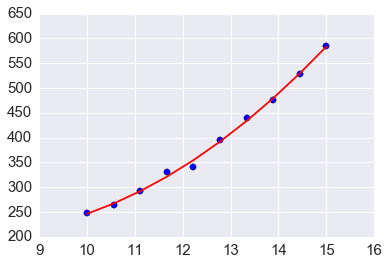

In [3]:
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
b = np.loadtxt('b.txt')

plt.scatter(x, y, s=40)
plt.plot(x, b[0] + b[1]*x + b[2]*x**2, c='red')
pass